In [1]:
import pandas as pd
df_171819= pd.read_csv("171819_DATA.csv")
df_171819.columns

Index(['Unnamed: 0', 'VendorID', 'lpep_pickup_datetime',
       'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_hour', 'pickup_minutes', 'dropOff_year',
       'dropOff_month', 'dropOff_day', 'dropOff_hour', 'dropOff_minutes',
       'duration', 'speed'],
      dtype='object')

In [2]:
#df_171819 = df_171819[(df_171819['pickup_year']==2017) & ((df_171819['pickup_month']==1)  | (df_171819['pickup_month']==2))]
df_171819.shape

(20953187, 30)

In [3]:
from datetime import datetime,date
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays()
#print(holidays)
df_holidays = pd.DataFrame({'holidays':holidays})
df_holidays['holidays'] = df_holidays['holidays'].astype('datetime64[ns]')
#df_holidays[df_holidays[]]
y=['2017','2018','2019']
holiday_17=df_holidays[pd.DatetimeIndex(df_holidays['holidays']).year ==2017]
holiday_18=df_holidays[pd.DatetimeIndex(df_holidays['holidays']).year ==2018]
holiday_19=df_holidays[pd.DatetimeIndex(df_holidays['holidays']).year ==2019]
#df_holidays.dtypes

hol171819=pd.concat([holiday_17,holiday_18,holiday_19])

In [4]:
df_171819['lpep_pickup_datetime']=pd.to_datetime(df_171819['lpep_pickup_datetime']).dt.date

In [5]:
df_171819['dt_weekday']= pd.to_datetime(df_171819['lpep_pickup_datetime']).dt.weekday

In [6]:
df_171819['lpep_pickup_datetime']=pd.to_datetime(df_171819['lpep_pickup_datetime'])

In [7]:
import numpy as np
df_171819 = df_171819.merge(hol171819,left_on='lpep_pickup_datetime',right_on='holidays',how='left')


In [50]:
df_171819[df_171819['duration'] > 200] 

,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_minutes,dropOff_year,dropOff_month,dropOff_day,dropOff_hour,dropOff_minutes,duration,speed,dt_weekday,holidays
18929,20309,2,2017-01-01,2017-01-01 13:24:34,1,42,153,1,4.80,16.5,...,8,2017,1,1,13,24,436.0,0.660550,6,1
23338,25086,2,2017-01-01,2017-01-01 16:52:47,5,129,70,1,6.14,5.0,...,35,2017,1,1,16,52,257.0,1.433463,6,1
28369,30435,2,2017-01-01,2017-01-02 00:00:00,1,43,239,1,2.16,8.0,...,40,2017,1,2,0,0,440.0,0.294545,6,1
28385,30453,2,2017-01-01,2017-01-02 00:00:00,1,85,155,1,5.49,26.0,...,17,2017,1,2,0,0,463.0,0.711447,6,1
28958,31053,2,2017-01-01,2017-01-02 00:00:00,1,7,56,1,4.50,17.5,...,34,2017,1,2,0,0,386.0,0.699482,6,1
29029,31130,2,2017-01-01,2017-01-02 00:00:00,1,240,94,1,2.52,11.0,...,10,2017,1,2,0,0,410.0,0.368780,6,1
29137,31242,2,2017-01-01,2017-01-02 00:00:00,1,250,235,1,4.68,17.0,...,32,2017,1,2,0,0,388.0,0.723711,6,1
29174,31285,2,2017-01-01,2017-01-02 00:00:00,1,129,193,1,3.20,11.5,...,1,2017,1,2,0,0,419.0,0.458234,6,1
29637,31771,2,2017-01-01,2017-01-02 00:00:00,1,260,226,6,0.53,3.5,...,54,2017,1,2,0,0,366.0,0.086885,6,1
30475,32665,2,2017-01-01,2017-01-02 00:00:00,1,17,39,3,5.64,22.5,...,40,2017,1,2,0,0,320.0,1.057500,6,1


,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_minutes,dropOff_year,dropOff_month,dropOff_day,dropOff_hour,dropOff_minutes,duration,speed,dt_weekday,holidays
29637,31771,2,2017-01-01,2017-01-02 00:00:00,1,260,226,6,0.53,3.5,...,54,2017,1,2,0,0,366.0,0.086885,6,1
31084,33319,2,2017-01-01,2017-01-01 20:12:32,1,223,179,1,0.74,4.5,...,9,2017,1,1,20,12,123.0,0.360976,6,1
51890,55845,2,2017-01-02,2017-01-03 00:00:00,1,65,97,1,0.73,4.5,...,25,2017,1,3,0,0,395.0,0.110886,0,0
52492,56484,2,2017-01-02,2017-01-03 00:00:00,1,129,83,1,0.72,6.0,...,48,2017,1,3,0,0,372.0,0.116129,0,0
53255,57322,2,2017-01-02,2017-01-03 00:00:00,1,82,83,1,0.71,6.0,...,0,2017,1,3,0,0,360.0,0.118333,0,0
53258,57326,2,2017-01-02,2017-01-03 00:00:00,1,256,256,1,0.91,8.0,...,5,2017,1,3,0,0,355.0,0.153803,0,0
53453,57537,2,2017-01-02,2017-01-03 00:00:00,1,159,247,1,0.98,7.0,...,10,2017,1,3,0,0,350.0,0.168000,0,0
55519,59765,2,2017-01-02,2017-01-03 00:00:00,1,7,7,1,0.76,5.0,...,36,2017,1,3,0,0,264.0,0.172727,0,0
55949,60219,2,2017-01-02,2017-01-03 00:00:00,1,41,42,1,0.78,5.0,...,55,2017,1,3,0,0,245.0,0.191020,0,0
79088,85510,2,2017-01-03,2017-01-04 00:00:00,1,134,134,1,0.73,4.5,...,35,2017,1,4,0,0,385.0,0.113766,1,0


In [8]:
df_171819.head()
df_171819.dtypes

Unnamed: 0                        int64
VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime            object
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int64
trip_type                       float64
pickup_year                       int64
pickup_month                      int64
pickup_day                        int64
pickup_hour                       int64
pickup_minutes                    int64
dropOff_year                      int64
dropOff_month                     int64


In [9]:
df_171819['holidays']= np.where(df_171819['holidays']== 'NaT', 0, 1)
df_171819['holidays']= np.where(df_171819['dt_weekday']== 5, 1, 0)
df_171819['holidays']= np.where(df_171819['dt_weekday']== 6, 1, 0)

In [10]:
df_171819.head()

,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_minutes,dropOff_year,dropOff_month,dropOff_day,dropOff_hour,dropOff_minutes,duration,speed,dt_weekday,holidays
0,0,2,2017-01-01,2017-01-01 00:11:05,1,42,166,1,1.71,9.0,...,1,2017,1,1,0,11,10.0,10.260000,6,1
1,1,2,2017-01-01,2017-01-01 00:09:00,1,75,74,1,1.44,6.5,...,3,2017,1,1,0,9,6.0,14.400000,6,1
2,2,2,2017-01-01,2017-01-01 00:12:55,1,82,70,5,3.45,12.0,...,4,2017,1,1,0,12,8.0,25.875000,6,1
3,3,2,2017-01-01,2017-01-01 00:14:23,1,255,232,1,2.11,10.5,...,1,2017,1,1,0,14,13.0,9.738462,6,1
4,4,2,2017-01-01,2017-01-01 00:18:55,1,166,239,1,2.76,11.5,...,0,2017,1,1,0,18,18.0,9.200000,6,1


In [91]:
df17=df_171819[df_171819['pickup_year']==2017]
df18=df_171819[df_171819['pickup_year']==2018]
df19=df_171819[df_171819['pickup_year']==2019]

df_1718=pd.concat([df17,df18])

df_1718=df_1718[(df_1718['trip_distance']>1)&(df_1718['trip_distance']<80)]
df19=df19[(df19['trip_distance']>1)&(df19['trip_distance']<80)]


In [ ]:
df_1718[df_1718['durations']> 300 & df_1718['trip_distance']<2]

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [61]:
import statsmodels as sm
import statsmodels.formula.api as smf

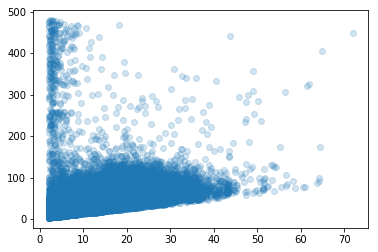

In [90]:
plt.scatter(df19['trip_distance'],df19['duration'], alpha=0.2)

plt.show()

In [92]:
mod=smf.quantreg('duration ~ trip_distance', df_1718)

In [102]:
quantiles = [0.05,.25, .50, .75, 0.99]
res_all = [mod.fit(q=q) for q in quantiles]

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)


In [94]:
# quantiles.append(.99)
# res_all.append(mod.fit(q=0.99))

In [95]:
# filename='all_lqr_models.sav'
# pickle.dump(res_all, open(filename, 'wb'))

In [103]:
res_ols = smf.ols('duration ~ trip_distance', df_1718).fit()

In [104]:
x_p=df19['trip_distance']

In [105]:
print(x_p.shape)

(1538232,)


In [106]:
    # get prediction for the model and plot
    # here we use a dict which works the same way as the df in ols
res_pred=[res.predict(pd.DataFrame(x_p)) for res in res_all]

In [107]:
for i in range(len(quantiles)):
    e=res_pred[i]-df19['duration']
    e[e >=0]=quantiles[i]*e
    e[e > 0]=(1-quantiles[i])*e
    print(sum(df19['duration']-e)/len(df19['duration']))
    #print(i,max(quantiles[0]*(res_pred[0]-df19['duration']),(1-quantiles[0])*(res_pred[0]-df19['duration'])))

27.8972993374
24.4275095615
21.6873547709
19.4876712564
18.7853079867


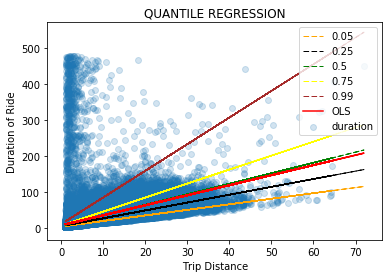

In [110]:
import matplotlib.pyplot as plt
col=["orange","black", "green","yellow", "brown"]
for qm, res, c in zip(quantiles, res_all, col):
    # get prediction for the model and plot
    # here we use a dict which works the same way as the df in ols
    plt.plot(x_p, res.predict(pd.DataFrame(x_p)), linestyle='--', lw=1, color=c, label=qm)
#     plt.xlim(0,120)
#     plt.ylim(0,700)
#     plt.title(qm)
#     plt.show()
y_ols_predicted = res_ols.predict(pd.DataFrame(x_p))
plt.plot(x_p, y_ols_predicted, color='red', label='OLS')
plt.scatter(df19.trip_distance, df19.duration, alpha=.2)
plt.title("QUANTILE REGRESSION")
plt.xlabel("Trip Distance")
plt.ylabel("Duration of Ride")
#plt.ylim(0, 600)
#plt.xlim(0,50)
plt.legend()
plt.show()

In [ ]:
#linear quantile regression
model1=smf.quantreg('duration ~ VendorID + PULocationID + DOLocationID + RatecodeID + passenger_count + trip_distance + payment_type +trip_type + total_amount +speed + holidays', data=df_1718)
# #model1=smf.quantreg('duration ~ trip_distance ', data=df_1718)

In [ ]:
res=model1.fit(q=0.5)
print(res.summary())

In [ ]:
res2=model1.fit(q=0.25)
print(res2.summary()) 

In [ ]:
res3=model1.fit(q=0.75)
print(res3.summary()) 

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor=LinearRegression()
Y=df_1718['duration']
X=df_1718[['VendorID','PULocationID', 'DOLocationID','RatecodeID', 'passenger_count', 'trip_distance','payment_type','trip_type', 'total_amount','speed','holidays']]
fit=regressor.fit(X, Y)


In [ ]:
def fit_model(q):
    res = model1.fit(q=q)
    return [q, res.params['Intercept'], res.params['VendorID'], res.params['PULocationID'], res.params['RatecodeID'],
            res.params['passenger_count'], res.params['trip_distance'], res.params['payment_type'], res.params['trip_type'], 
           res.params['total_amount'], res.params['speed'], res.params['holidays']]
''
quantiles=[0.2, 0.4, 0.6, 0.8, 0.99]
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['Intercept', 'VendorID','PULocationID', 'DOLocationID','RatecodeID', 'passenger_count', 'trip_distance','payment_type','trip_type', 'total_amount','speed','holidays'])

print(models)

In [ ]:
filename='QR_q0.5.sav'
pickle.dump(model1, open(filename, 'wb'))